# Logistic Regression


new_hours is: [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]
predictions value is: [0.01748531 0.05368433 0.1531435  0.36566568 0.64758545 0.85417661
 0.9491671  0.98347699 0.99475718 0.99834936 0.9994816  0.99983732]


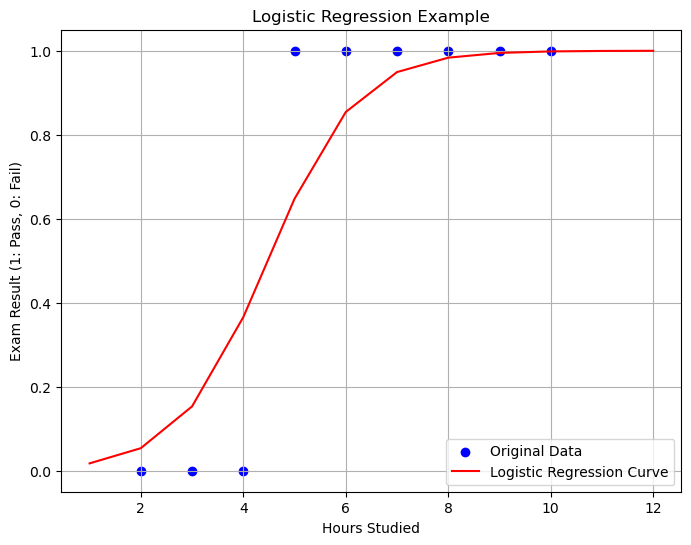

In [169]:

import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Given data
hours_studied = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
exam_results = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1])

# Creating a logistic regression model

model = LogisticRegression()

# Training the model with the given data
model.fit(hours_studied, exam_results)

# Making predictions for new data points (e.g., hours_studied from 1 to 12)
new_hours = np.arange(1, 13).reshape(-1, 1)

print("new_hours is:", new_hours)

predictions = model.predict_proba(new_hours)[:, 1]

print("predictions value is:",predictions)
# Plotting the original data points and the logistic regression curve
plt.figure(figsize=(8, 6))
plt.scatter(hours_studied, exam_results, color='blue', label='Original Data')
plt.plot(new_hours, predictions, color='red', label='Logistic Regression Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Result (1: Pass, 0: Fail)')
plt.title('Logistic Regression Example')
plt.legend()
plt.grid(True)
plt.show()


# Implementation of Logistic Regression

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns

In [171]:
df=sns.load_dataset('iris')

In [172]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [173]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [174]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [175]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [176]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [177]:
df= df[df['species']!='setosa']

In [178]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [179]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [180]:
df['species'].unique()

array([0, 1], dtype=int64)

In [181]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# le.fit(df['species'])
# df['species']=le.transform((df['species']))

In [182]:
# df['species'].value_counts()

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]

In [186]:
# x.head(3)

In [187]:
y=df['species']

In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [205]:
# x_train.head(2)

In [206]:
classifier=LogisticRegression()

In [207]:
classifier_reg=classifier.fit(x_train, y_train)

In [208]:
y_pred=classifier_reg.predict(x_test)

In [209]:
from sklearn.metrics import classification_report

In [210]:
classification_matrix=classification_report(y_pred,y_test)

In [211]:
print(classification_matrix)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


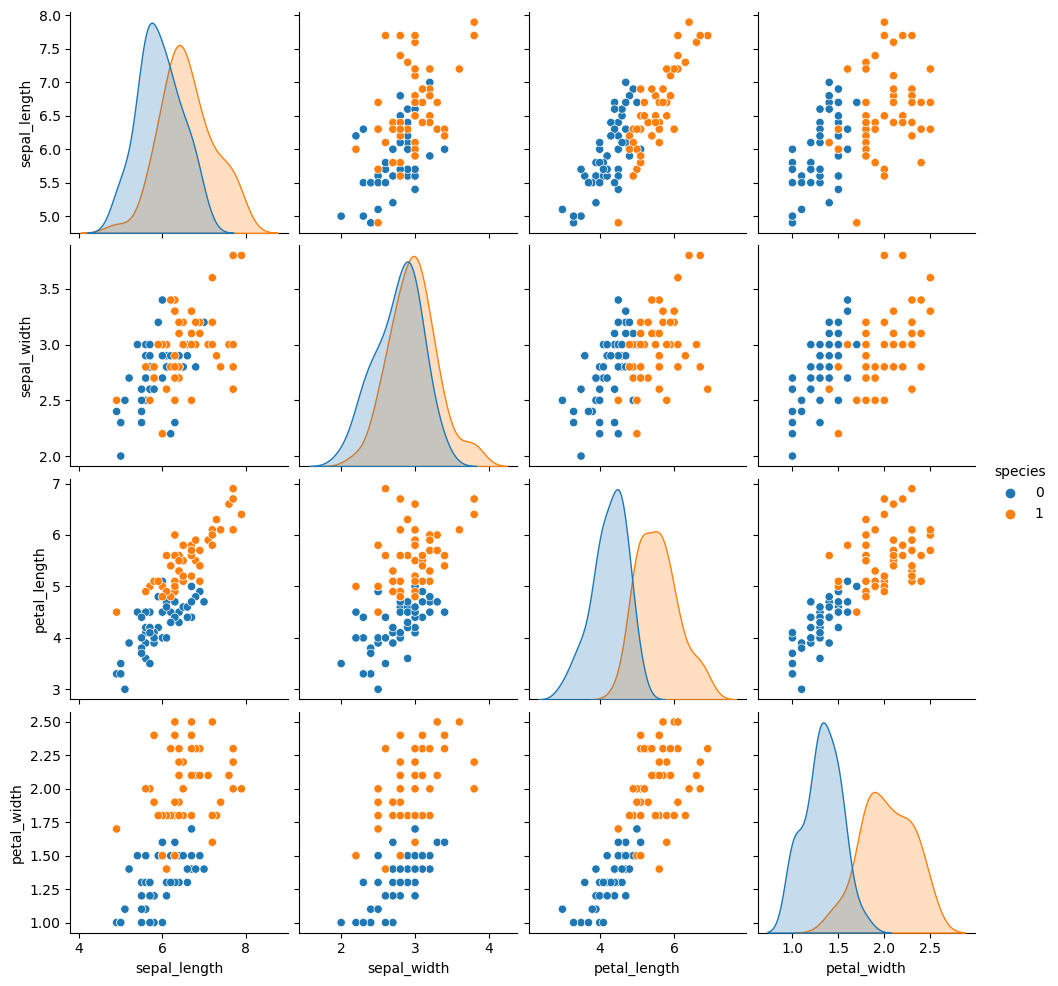

In [212]:
sns.pairplot(df,hue='species',markers='o')

In [213]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


<Axes: >

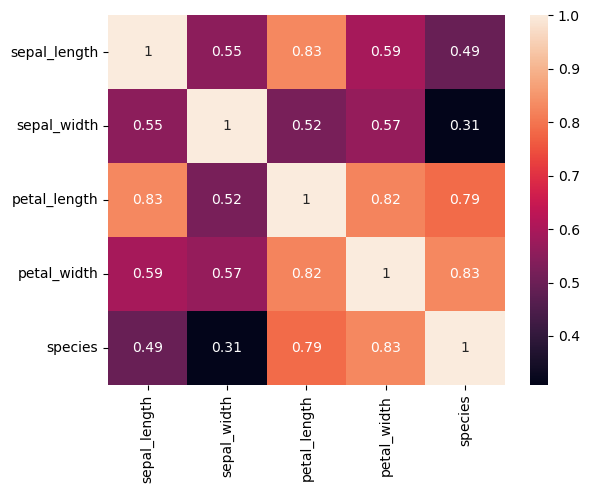

In [214]:
sns.heatmap(df.corr(), annot=True)

In [215]:
from sklearn.metrics import confusion_matrix

In [216]:
cm=confusion_matrix(y_pred,y_test)

In [217]:
cm

array([[11,  0],
       [ 1,  8]], dtype=int64)

<Axes: >

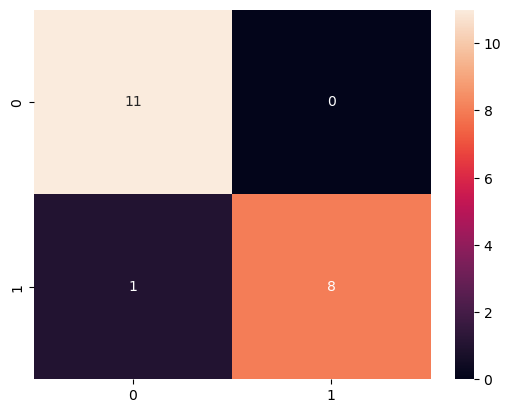

In [218]:
sns.heatmap(cm,annot=True)